In [1]:
import numpy as np
import geopandas as gpd

from functions import *

In [189]:
friction = r"C:\Proposals\CCA\LPG_CODE_TEST_LAYERS\Friction layer.tif"
supply_points = r"C:\Proposals\CCA\LPG_CODE_TEST_LAYERS\LPG_start.shp"
new_friction = r"C:\Proposals\CCA\LPG_CODE_TEST_LAYERS\new_friction.tif"
mask = r"C:\Proposals\CCA\gadm36_NPL_shp\gadm36_NPL_0.shp"

In [107]:
#Finding start points
row, col = friction_start_points(friction, supply_points, new_friction)

In [108]:
#addings start points to array
pointlist = []
i = 0
for test in row:
    positiions = (row[i],col[i])
    pointlist.append(positiions)
    i = i+1

In [199]:
#Creating array that will be used in dijkstra
def mask_raster(raster_path, mask_layer, outpul_file, nodata=0, compression='NONE'):
    if isinstance(mask_layer, str):
        with fiona.open(mask_layer, "r") as shapefile:
            shapes = [feature["geometry"] for feature in shapefile]
            crs = 'EPSG:4326'
    else:
        shapes = [mask_layer.dissolve().geom.loc[0]]
        crs = mask_layer.crs

    with rasterio.open(raster_path) as src:
        out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True, nodata=nodata)
        out_meta = src.meta

    out_meta.update({"driver": "GTiff",
                     "height": out_image.shape[2],
                     "width": out_image.shape[2],
                     "transform": out_transform,
                     'compress': compression,
                     'nodata': nodata,
                     "crs": crs})
    
    print(out_transform)
    
    with rasterio.open(outpul_file, "w", **out_meta) as dest:
        dest.write(out_image)
        
mask_raster(friction, mask, new_friction)
        
#arr[tuple(np.array(pointlist).T)] = 0
#arr.shape
#G.add_nodes_from(img)
#pos = nx.spring_layout(G)
#nx.draw_networkx_nodes(G, pos)
#tst = nx.astar_path(G,0,G)
#G = nx.Graph()
#for path in arr:
#    nx.add_path(G, path)



| 0.01, 0.00, 80.07|
| 0.00,-0.01, 30.44|
| 0.00, 0.00, 1.00|


In [203]:
gt

NameError: name 'gt' is not defined

In [242]:
def saveRaster(input_file, output_file):
    """
    Saving memory raster. 

    Parameters
    ----------
    arg1 : input_file
        Memory raster to save to disc
    arg2 : output_file
        The path to the save raster
    """ 
    drv = gdal.GetDriverByName('GTiff')
    dst_ds = drv.Create(input_file.RasterXSize, input_file.RasterXSize, 1,
                        gdal.GetDataTypeByName('Float32'))
    
    #kwargs = {'creationOptions': ['COMPRESS=LZW']}
    gdal.Warp(output_file, input_file, **dst_ds)
src_ds = gdal.Open(friction)
saveRaster(src_ds, new_friction)

RuntimeError: not a string

In [224]:


def proximity_raster(src_filename, dst_filename):
    src_ds = gdal.Open(src_filename)
    srcband=src_ds.GetRasterBand(1)
    dst_filename=dst_filename

    drv = gdal.GetDriverByName('GTiff')
    dst_ds = drv.Create(dst_filename,
                        src_ds.RasterXSize, src_ds.RasterXSize, 1,
                        gdal.GetDataTypeByName('Float32'))

    dst_ds.SetGeoTransform( src_ds.GetGeoTransform() )
    dst_ds.SetProjection( src_ds.GetProjectionRef() )

In [200]:
from scipy.sparse import csr_matrix
#arr = [[2, 3], [5, 5]]
graph = csr_matrix(arr)
graph

<491x976 sparse matrix of type '<class 'numpy.float32'>'
	with 479216 stored elements in Compressed Sparse Row format>

In [167]:
from scipy.sparse.csgraph import dijkstra
distances, predecessors = dijkstra(arr, indices=pointlist[0],return_predecessors=True)

ValueError: graph should be a square array

In [57]:
import pandas as pd
x = pd.DataFrame(data=arr, index=np.arange(1, 492), columns=np.arange(1, 977))

In [142]:
#* Create graph
for point in pointlist:
    nx.astar_path(G,0.039723188,0.04965609)
#    *Dijkstra
#    *Save np.array


#*Combine arrays taking the minimum of each element

NodeNotFound: Either source 0.039723188 or target 0.04965609 is not in G

In [60]:
import networkx as nx
G = nx.DiGraph(df2)
df2 = pd.concat([x, x.T]).fillna(0)
df2

In [39]:
am = (np.dot(im, im.T)).astype(int)
am

array([[13, 25,  0],
       [25, 53,  0],
       [ 0,  0,  0]])

Add node: foo
Add node: b
Add node: a
Add node: r
Remove node: b
Remove node: a
Remove node: r
Nodes in G:  [('foo', {'attr_dict': None})]
Add edge: 0-1
Edges in G:  [(0, 1, {'attr_dict': None, 'weight': 10})]
Remove edge: 0-1
Add edge: 0-1
Add edge: 1-2
Add edge: 2-3
Edges in G:  [(0, 1, {'attr_dict': None, 'weight': 10}), (1, 2, {'attr_dict': None, 'weight': 10}), (2, 3, {'attr_dict': None, 'weight': 10})]
Remove edge: 0-1
Remove edge: 1-2
Remove edge: 2-3
Edges in G:  []
Add node: 0
Add edge: 0-1
Add edge: 1-2
Add edge: 2-3
Add edge: 3-4
Add edge: 4-5
Add edge: 5-6
Add edge: 6-7
Add edge: 7-8
Add edge: 8-9
Add node: 9
Add edge: 9-10
Add edge: 9-11
Add edge: 9-12


'C:\\Proposals\\CCA\\LPG_CODE_TEST_LAYERS\\Friction layer.tif'

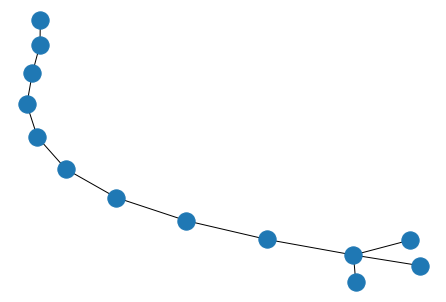

In [98]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx import Graph


class PrintGraph(Graph):
    """
    Example subclass of the Graph class.

    Prints activity log to file or standard output.
    """

    def __init__(self, data=None, name="", file=None, **attr):
        Graph.__init__(self, data=data, name=name, **attr)
        if file is None:
            import sys

            self.fh = sys.stdout
        else:
            self.fh = open(file, "w")

    def add_node(self, n, attr_dict=None, **attr):
        Graph.add_node(self, n, attr_dict=attr_dict, **attr)
        self.fh.write(f"Add node: {n}\n")

    def add_nodes_from(self, nodes, **attr):
        for n in nodes:
            self.add_node(n, **attr)

    def remove_node(self, n):
        Graph.remove_node(self, n)
        self.fh.write(f"Remove node: {n}\n")

    def remove_nodes_from(self, nodes):
        for n in nodes:
            self.remove_node(n)

    def add_edge(self, u, v, attr_dict=None, **attr):
        Graph.add_edge(self, u, v, attr_dict=attr_dict, **attr)
        self.fh.write(f"Add edge: {u}-{v}\n")

    def add_edges_from(self, ebunch, attr_dict=None, **attr):
        for e in ebunch:
            u, v = e[0:2]
            self.add_edge(u, v, attr_dict=attr_dict, **attr)

    def remove_edge(self, u, v):
        Graph.remove_edge(self, u, v)
        self.fh.write(f"Remove edge: {u}-{v}\n")

    def remove_edges_from(self, ebunch):
        for e in ebunch:
            u, v = e[0:2]
            self.remove_edge(u, v)

    def clear(self):
        Graph.clear(self)
        self.fh.write("Clear graph\n")


G = PrintGraph()
G.add_node("foo")
G.add_nodes_from("bar", weight=8)
G.remove_node("b")
G.remove_nodes_from("ar")
print("Nodes in G: ", G.nodes(data=True))
G.add_edge(0, 1, weight=10)
print("Edges in G: ", G.edges(data=True))
G.remove_edge(0, 1)
G.add_edges_from(zip(range(0, 3), range(1, 4)), weight=10)
print("Edges in G: ", G.edges(data=True))
G.remove_edges_from(zip(range(0, 3), range(1, 4)))
print("Edges in G: ", G.edges(data=True))

G = PrintGraph()
nx.add_path(G, range(10))
nx.add_star(G, range(9, 13))

nx.draw(G)
friction